In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

40.47310794548204 -134.84399239583496
-74.20370653702813 75.82775255699039
29.744737043942536 -10.401367170941882
63.77684734305325 52.336274364989265
-24.683753734046903 -65.7985462387099
-5.622162293696277 178.99904959511946
-43.284391466310474 35.07395741799411
7.2624238995734345 15.947008001743058
46.297577102024206 -26.36526103372782
86.79055405880212 -179.39073648162645
-56.7368616196991 154.80411481246256
-4.290174261607987 164.48806337346088
48.15076875327486 -37.9645807242089
-87.88986408211598 -159.54071947089625
-34.58169064215439 90.7919869846857
-35.88604218201017 -131.95878141835524
7.95024958335371 -28.00728625326272
52.88670840062909 -40.00696510252851
-6.0273150184675615 -56.414423293026104
3.039402796750565 37.56034065088693
-65.76697211177681 -107.67072089034895
-56.62983098513131 -28.52939424979391
12.797338561863342 -163.0577037166454
37.992426299024686 100.3697438721677
75.59803865458417 171.52539624377658
1.0530156556389727 62.567792397148565
-30.578611342530145 

-68.95138416042043 93.59923438664742
-71.54000124955643 -107.12696400438875
51.78973854185142 45.854946188894274
-3.364167318980023 -165.93913303995123
-82.69729155891139 31.01417062276485
71.49705422939505 92.40923606390027
-77.81044488595558 -84.5538904814286
-8.892232233991152 -31.89515943815647
3.549789888915811 -136.69224234452895
-16.351945814085056 -6.216561373003287
-29.0489638191819 -115.58290451890335
-75.86311351196352 57.40372573105083
71.70696832949713 -135.25050949918807
-82.41417362200707 -64.64948261407777
34.022493020097556 -99.74375041544306
52.65751966165371 -150.5169930418267
-20.620444864602916 97.31860039182976
-78.94261433389383 163.22535400920475
-26.946799707143235 8.08845173888625
84.4987677835719 -124.4455025464786
4.505908805416922 -63.677466458161476
-40.83913212868343 42.08989566036914
-19.460262396520264 -150.68790366100424
-14.932190964076554 137.5599127214707
10.167717846840645 -95.24747935958315
27.585048245451134 105.40061270069816
-88.47955156862606 

32.2655908894524 32.1792772418583
49.393024448254636 84.84821172560521
-82.24205377729854 52.48385442673762
16.926099002867602 -126.38168918028161
-46.30312595244214 -6.637231873931739
-80.91916135064307 23.9957361342137
-34.9916532164303 154.28824777569912
-58.830277291331896 -94.50839413838952
44.208078227981844 24.200375560346117
-9.148247245073392 43.36107465504685
53.64345339151535 161.69116271488986
-24.372794096800334 121.17521195523057
36.72847370632135 -145.49390944229646
-17.55308553394869 -144.40394817798114
44.656643447191016 -74.50212499091421
-13.832852357208438 -78.6561769252904
74.24981801141209 137.56973217273793
-3.52567986186412 -45.72365071348878
24.925791309660795 48.63289031117179
-61.381694719161004 -9.622484110751401
-72.1125533384929 70.09465192445614
-85.30128826650987 127.21038699114519
-30.02020335626669 -3.350314898059594
-77.79295768917977 -45.50572405939903
17.86691125157536 158.15403148814607
80.690565776153 -42.16056847179641
-5.902154857296267 9.144776

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd082eecb3e6c28dc6d672bce793e46a


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | eureka
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | tiznit
Processing Record 4 of Set 1 | borovoy
Processing Record 5 of Set 1 | salta
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | bol
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | auki
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | jacareacanga
Processing Record 20 of Set 1 | marsabit
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | chuy
Processing Record 23

Processing Record 42 of Set 4 | puerto penasco
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | buluang
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | yelets
Processing Record 47 of Set 4 | bereda
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | nome
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | tomakomai
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | bac lieu
Processing Record 5 of Set 5 | arman
Processing Record 6 of Set 5 | rosario oeste
Processing Record 7 of Set 5 | borogontsy
Processing Record 8 of Set 5 | vao
Processing Record 9 of Set 5 | lolua
City not found. Skipping...
Processing Record 10 of Set 5 | peniche
Processing Record 11 of Set 5 | noumea
Processing Record 12 of Set 5 | amparafaravola
Processing Record 13 of Set 5 | topeka
Processing Record 14 of Set 5 | anahuac
Process

Processing Record 28 of Set 8 | santo domingo
Processing Record 29 of Set 8 | dulovo
Processing Record 30 of Set 8 | kirakira
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | antofagasta
Processing Record 33 of Set 8 | carauari
Processing Record 34 of Set 8 | wentzville
Processing Record 35 of Set 8 | jaffna
Processing Record 36 of Set 8 | abnub
Processing Record 37 of Set 8 | kavaratti
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | boguchany
Processing Record 40 of Set 8 | saleaula
City not found. Skipping...
Processing Record 41 of Set 8 | sao gabriel da cachoeira
Processing Record 42 of Set 8 | chapais
Processing Record 43 of Set 8 | zhicheng
Processing Record 44 of Set 8 | olafsvik
Processing Record 45 of Set 8 | kaitangata
Processing Record 46 of Set 8 | vila franca do campo
Processing Record 47 of Set 8 | san martin
Processing Record 48 of Set 8 | shakawe
Processing Record 49 of Set 8 | sitka
Processing Record 50 of Set 8 | mo

Processing Record 10 of Set 12 | tapiramuta
Processing Record 11 of Set 12 | vardo
Processing Record 12 of Set 12 | butia
Processing Record 13 of Set 12 | casper
Processing Record 14 of Set 12 | rio gallegos
Processing Record 15 of Set 12 | linxia
Processing Record 16 of Set 12 | bushehr
Processing Record 17 of Set 12 | cairo
Processing Record 18 of Set 12 | charyshskoye
Processing Record 19 of Set 12 | morondava
Processing Record 20 of Set 12 | dudinka
Processing Record 21 of Set 12 | canchungo
Processing Record 22 of Set 12 | haines junction
Processing Record 23 of Set 12 | gulshat
City not found. Skipping...
Processing Record 24 of Set 12 | aranos
Processing Record 25 of Set 12 | myitkyina
Processing Record 26 of Set 12 | namatanai
Processing Record 27 of Set 12 | dehloran
Processing Record 28 of Set 12 | eldikan
City not found. Skipping...
Processing Record 29 of Set 12 | aleksandro-nevskiy
Processing Record 30 of Set 12 | brigantine
Processing Record 31 of Set 12 | toalmas
Process

In [11]:
len(cities)

616

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eureka,40.8021,-124.1637,67.39,81,65,5.99,US,2022-06-06 00:24:15
1,Saint-Philippe,-21.3585,55.7679,71.19,66,31,8.12,RE,2022-06-06 00:25:33
2,Tiznit,29.5833,-9.5000,69.10,61,100,1.83,MA,2022-06-06 00:25:33
3,Borovoy,55.4333,86.0833,40.28,93,100,13.42,RU,2022-06-06 00:25:34
4,Salta,-24.7859,-65.4117,54.19,82,0,6.91,AR,2022-06-06 00:25:34
5,Asau,46.4333,26.4000,58.95,94,97,3.47,RO,2022-06-06 00:25:34
6,East London,-33.0153,27.9116,60.69,76,27,10.83,ZA,2022-06-06 00:25:35
7,Bol,13.4586,14.7147,81.73,63,69,9.60,TD,2022-06-06 00:25:35
8,Lagoa,39.0500,-27.9833,63.90,95,85,16.89,PT,2022-06-06 00:25:35
9,Hobart,-42.8794,147.3294,52.27,65,75,17.27,AU,2022-06-06 00:25:36


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eureka,US,2022-06-06 00:24:15,40.8021,-124.1637,67.39,81,65,5.99
1,Saint-Philippe,RE,2022-06-06 00:25:33,-21.3585,55.7679,71.19,66,31,8.12
2,Tiznit,MA,2022-06-06 00:25:33,29.5833,-9.5000,69.10,61,100,1.83
3,Borovoy,RU,2022-06-06 00:25:34,55.4333,86.0833,40.28,93,100,13.42
4,Salta,AR,2022-06-06 00:25:34,-24.7859,-65.4117,54.19,82,0,6.91
5,Asau,RO,2022-06-06 00:25:34,46.4333,26.4000,58.95,94,97,3.47
6,East London,ZA,2022-06-06 00:25:35,-33.0153,27.9116,60.69,76,27,10.83
7,Bol,TD,2022-06-06 00:25:35,13.4586,14.7147,81.73,63,69,9.60
8,Lagoa,PT,2022-06-06 00:25:35,39.0500,-27.9833,63.90,95,85,16.89
9,Hobart,AU,2022-06-06 00:25:36,-42.8794,147.3294,52.27,65,75,17.27


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

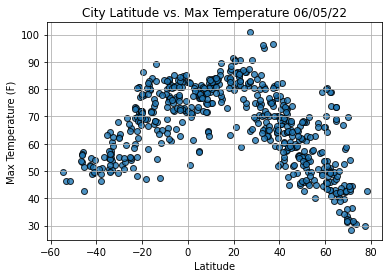

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

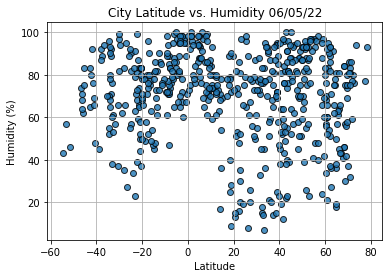

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

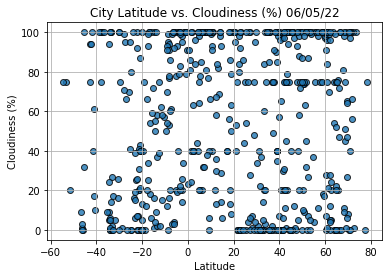

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

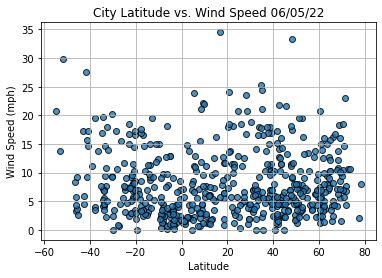

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [26]:
index13 = city_data_df.loc[13]
index13

City                    Geraldton
Country                        AU
Date          2022-06-06 00:25:38
Lat                      -28.7667
Lng                         114.6
Max Temp                    52.21
Humidity                       62
Cloudiness                      1
Wind Speed                  17.27
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
552     True
553     True
554     True
555    False
556     True
Name: Lat, Length: 557, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eureka,US,2022-06-06 00:24:15,40.8021,-124.1637,67.39,81,65,5.99
2,Tiznit,MA,2022-06-06 00:25:33,29.5833,-9.5000,69.10,61,100,1.83
3,Borovoy,RU,2022-06-06 00:25:34,55.4333,86.0833,40.28,93,100,13.42
5,Asau,RO,2022-06-06 00:25:34,46.4333,26.4000,58.95,94,97,3.47
7,Bol,TD,2022-06-06 00:25:35,13.4586,14.7147,81.73,63,69,9.60


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

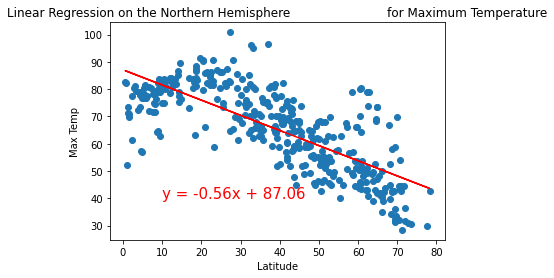

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

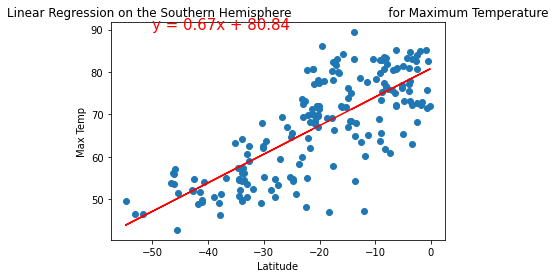

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

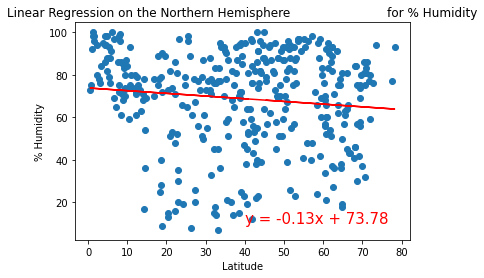

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

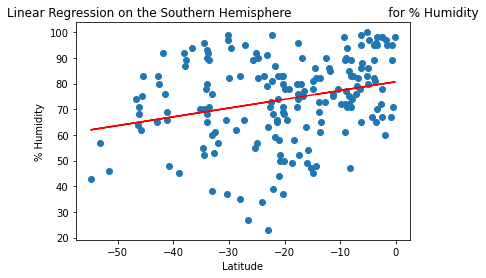

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

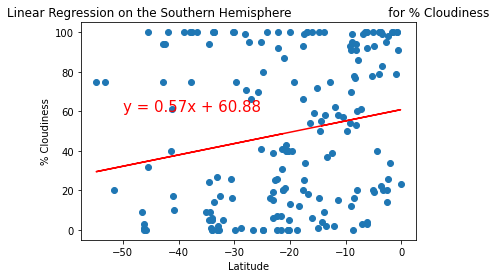

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

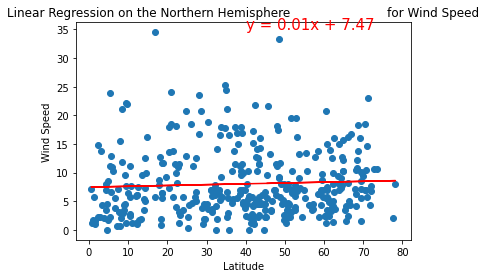

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

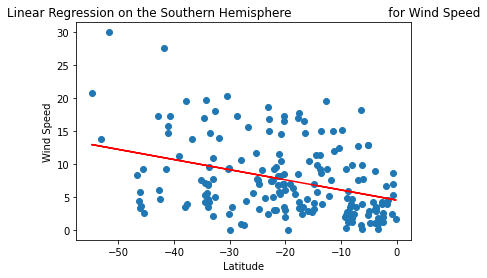

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
